In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from scipy import stats
from scipy import special
from tqdm import tqdm

# GT distribution of the obstacle

In [ ]:
p = 3
mu_0, lambda_, alpha, beta = 3.4548569, 0.02503136, 4.8973227 [0.06900783]



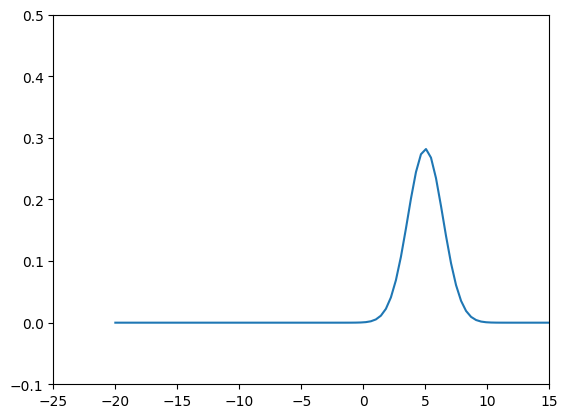

In [16]:
mu = 5
sigma_2 = 2
sigma = np.sqrt(sigma_2)
gt_dist = norm(loc=mu, scale=sigma)

l = np.linspace(-20, 20, 100)
plt.plot(l, gt_dist.pdf(l))
plt.xlim(-25, 15)
plt.ylim(-0.1, 0.5)
plt.show()

# observe samples

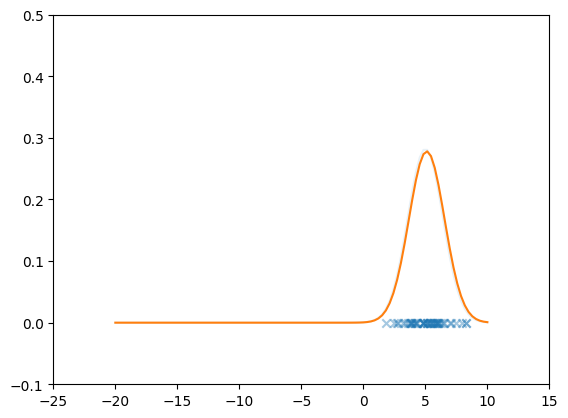

In [17]:

l = np.linspace(-20, 10, 100)
num_samples = 50
samples = norm.rvs(mu, sigma, size=num_samples)
mu_hat, sigma_hat = norm.fit(samples)


# plot GT distribution
# l = np.linspace(-20, 10, 100)
plt.plot(l, norm.pdf(l, mu, sigma), label='GT Gaussian Distribution', alpha=0.1)

# plot samples
# num_samples = 20
# samples = norm.rvs(mu, sigma, size=num_samples)
plt.scatter(samples,[0 for _ in range(num_samples)], marker='x', alpha=0.4, label='Observed Samples')

# plot pred distribution
# mu_hat, sigma_hat = norm.fit(samples)
# l = np.linspace(-20, 10, 100)
plt.plot(l, norm.pdf(l, mu_hat, sigma_hat), label='Predicted Gaussian Distribution')

plt.xlim(-25, 15)
plt.ylim(-0.1, 0.5)
plt.show()


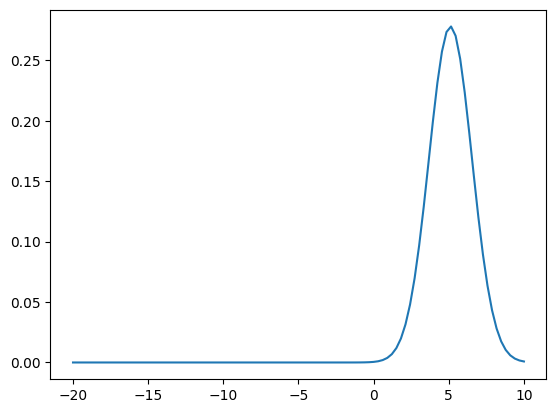

In [18]:
pred_dist = norm(loc=mu_hat, scale=sigma_hat)

plt.plot(l, pred_dist.pdf(l))
plt.show()

# loss = ego_position - obstable_position (obs is random variable)
- random variable에 음수가 붙어있어서 분포의 왼쪽에 risk가 생기게 된다.

$\theta$

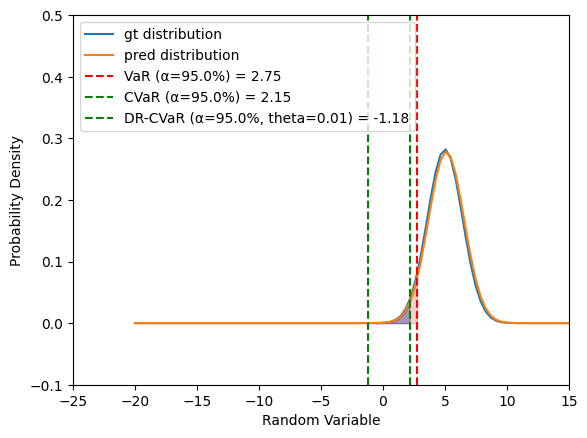

In [19]:
# alpha = 0.95
alpha = 0.95

l = np.linspace(-20, 20, 100)
plt.plot(l, gt_dist.pdf(l), label='gt distribution')
plt.plot(l, pred_dist.pdf(l), label='pred distribution')

x = np.linspace(mu_hat - 4*sigma_hat, mu_hat + 4*sigma_hat, 1000)
y = stats.norm.pdf(x, mu_hat, sigma_hat)

# VaR = gt_dist.ppf(alpha)
VaR_beta = np.sqrt(2) * special.erfinv(2*alpha-1)
VaR = mu_hat - VaR_beta * sigma_hat

#beta = norm.pdf(norm.ppf(alpha))/(1-alpha)
CVaR_beta = 1/(np.sqrt(2*np.pi)*(np.exp(special.erfinv(2*alpha - 1)**2))*(1-alpha))
CVaR = mu_hat - CVaR_beta * sigma_hat

DR_CVaR_beta = np.sqrt(alpha / (1-alpha))
theta = 0.01
DR_CVaR = mu_hat - DR_CVaR_beta * sigma_hat - theta * np.sqrt(1+DR_CVaR_beta**2)

plt.axvline(VaR, color='r', linestyle='--', label=f'VaR (α={alpha*100}%) = {VaR:.2f}')
plt.fill_between(x, 0, y, where=(x <= VaR), color='r', alpha=0.2)

plt.axvline(CVaR, color='g', linestyle='--', label=f'CVaR (α={alpha*100}%) = {CVaR:.2f}')
plt.fill_between(x, 0, y, where=(x <= CVaR), color='g', alpha=0.2)

plt.axvline(DR_CVaR, color='g', linestyle='--', label=f'DR-CVaR (α={alpha*100}%, theta={theta}) = {DR_CVaR:.2f}')
plt.fill_between(x, 0, y, where=(x <= CVaR), color='b', alpha=0.2)

plt.xlim(-25, 15)
plt.ylim(-0.1, 0.5)
plt.xlabel('Random Variable')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


# Plot safe region

In [2]:
plt.figure()

# y = x - risk
p=7
# line = [[p,p+1], [0,1]]
l = np.linspace(-20, 20, 100)
plt.plot(l, pred_dist.pdf(l))

labels = ['VaR', 'CVaR', 'DR_CVaR']
for i, risk in enumerate([VaR, CVaR, DR_CVaR]):
    plt.plot(l, (lambda x: x-risk)(l), label=labels[i])
plt.xlim(-5,10)
plt.ylim(-3,3)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.xlabel("Ego Position")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: name 'pred_dist' is not defined

<Figure size 640x480 with 0 Axes>

In [26]:
mu_0 = 5.011456
lambda_ = 0.03707089
alpha = 5.497464
beta = 0.00185288
epsilon = 0.95

In [27]:
from scipy.stats import norm, invgamma, t
import numpy as np
import matplotlib.pyplot as plt

In [23]:
mu = np.linspace(-4, 7, 100)
sigma2 = np.linspace(0., 0.5, 100)
mu_grid, sigma2_grid = np.meshgrid(mu, sigma2)

In [24]:
pdf_values = np.zeros_like(mu_grid)

for i in range(mu_grid.shape[0]):
    for j in range(mu_grid.shape[1]):
        mu_val = mu_grid[i, j]
        sigma2_val = sigma2_grid[i, j]
        # Normal-Inverse Gamma PDF (up to proportionality constant)
        # pdf_values[i, j] = (sigma2_val ** (-alpha - 1)) * np.exp(-beta / sigma2_val) * \
        #                    norm.pdf(mu_val, mu_0, np.sqrt(sigma2_val / lambda_))
        pdf_values[i, j] = invgamma.pdf(sigma2_val, alpha, beta) * norm.pdf(mu_val, mu_0, np.sqrt(sigma2_val / lambda_))


/home/opencda/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


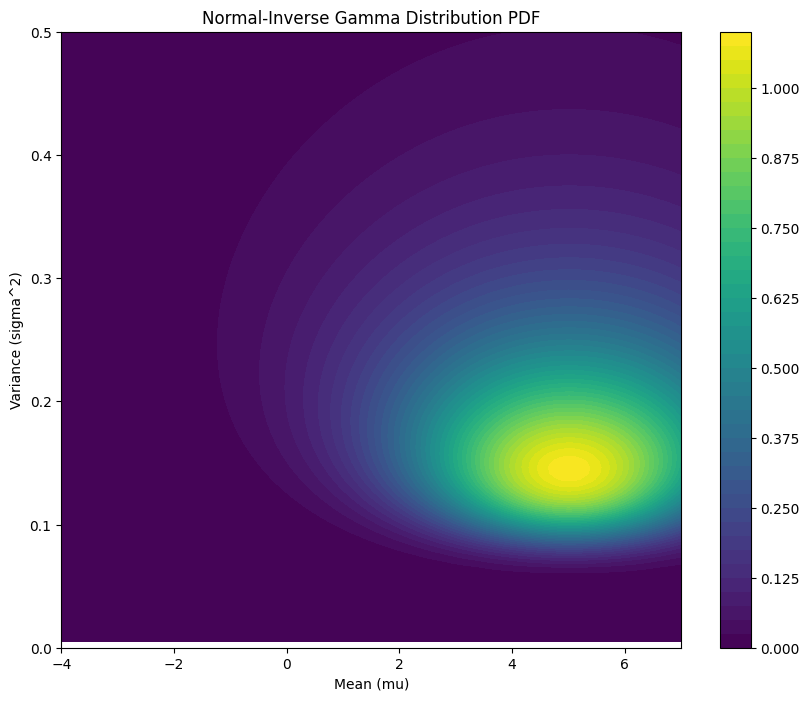

In [25]:
plt.figure(figsize=(10, 8))


cp = plt.contourf(mu, sigma2, pdf_values, levels=50, cmap='viridis')
plt.colorbar(cp)

plt.xlabel('Mean (mu)')
plt.ylabel('Variance (sigma^2)')
plt.title('Normal-Inverse Gamma Distribution PDF')

plt.xlim(-4,7)
plt.ylim(0,0.5)
plt.show()

In [30]:
cvar = mu_0 + (beta * (1+lambda_))/(lambda_*alpha)*((2*alpha+t.ppf(epsilon,2*alpha, (beta*(1+lambda_))/(lambda_*alpha), mu_0)**2)/((2*alpha-1)*(1-epsilon)))*t.pdf(t.ppf(epsilon,2*alpha, (beta*(1+lambda_))/(lambda_*alpha), mu_0), 2*alpha, (beta*(1+lambda_))/(lambda_*alpha), mu_0) 

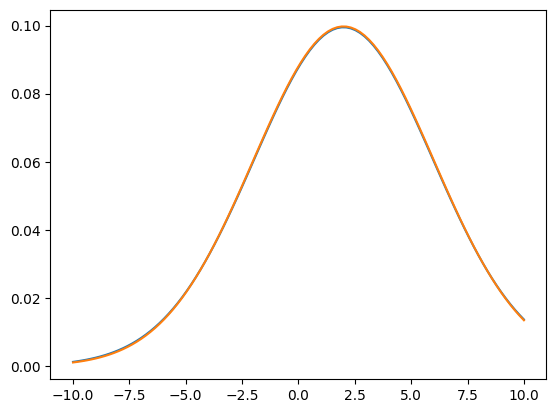

In [55]:
x = np.linspace(-10,10,100)
plt.plot(x, t.pdf(x,100, 2, 4))
plt.plot(x, norm.pdf(x, 2,4))
plt.show()